# Support Vector Machines (SVM)

Support Vector Machines (SVM) are a class of statistical learning methods based on the principle of margin maximization (class separation). There are several formulations (linear, kernel versions) that can be applied to separable data (linearly) but also to non-separable data.

The advantages of SVM:


* Very effective in high dimension.


* For the decision, do not use all the learning samples, but only a part (the support vectors). As a result, these algorithms require less memory.

Disadvantages:

* If the number of attributes is much larger than the number of samples, the performance is worse.

* They do not provide estimates of probabilities.

In Scikit-learn, SVMs are implemented in the $sklearn.svm$ module. In this part, we will focus on the linear version (Scikit-learn uses libLinear and libSVM libraries). We will use the Iris dataset already encountered in previous sessions. To be able to display the results, we will use only the first two attributes (length and width of the sepals).

The linear models $LinearSVC ()$ and $SVC (kernel = 'linear')$, produce slightly different results because they optimize different cost functions but also because of the fact that they handle multi-class problems differently (linearSVC uses One-vs-All and SVC uses One-vs-One).

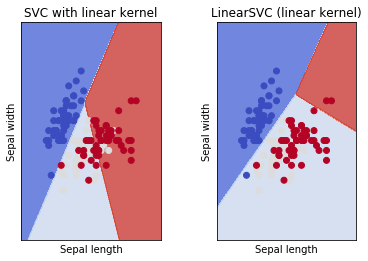

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
# load data
iris = datasets.load_iris()


# Keep only the two first attributes
X = iris.data[:, :2]
y = iris.target
# To display the decision surface we will discretize the space with a step h
h = .02
C = 100.0 # regulation parameter, it is the enalty parameter of the error term.
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# Create the discrete decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)']

for i, clf in enumerate((svc, lin_svc)):
    plt.subplot(1, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Use different color 
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Also show training data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    